<a href="https://colab.research.google.com/github/ikedoebber/Serie-Temporal-para-Departamento-de-vendas/blob/main/Dpt_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***DADOS DAS TRANSAÇÕES***


---


*   Id: identificador da transação (loja + data)

*   Loja: identificador único da loja 

*   Sales: vendas/dia (objetivo)

*   Customers: número de clientes no dia

*   Open: boleano que indica se a loja estava aberta ou fechada (1 = aberta, 0 = fechada)

*   Promo: se existe uma promoção no dia 


*   StateHoliday: feriado (a = feriado público, b = Páscoa, c = Natal, 0 = nenhum) 


*   SchoolHoliday: feriado escolar

***DADOS DAS LOJAS***


---


*   StoreType: tipo da loja (a, b, c, d)

*   Assortment: a = basic, b = extra, c = extended 

*   Competition Distance (metros): distância para a loja concorrente mais perto

*   Competition OpenSince [Month/Year]: data que a loja

*   Promo2: promoção contínua e consecutiva em algumas lojas (0 = não está participando, 1 = está participando)

*    Promo2Since [Year/Week]: data quando a loja começou a participar da Promo2

*   Promolnterval: intervalos consecutivos que a Promo2 é iniciada (meses). Exemplo: "Feb, May,Aug,Nov" indica que cada "round" da promoção começa em February, May, August, November


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [6]:
sales_train_df = pd.read_csv('/content/train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
sales_train_df.shape

(1017209, 9)

In [8]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
sales_train_df['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [10]:
sales_train_df['Open'].unique()

array([1, 0])

In [11]:
sales_train_df['Promo'].unique()

array([1, 0])

In [12]:
sales_train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [13]:
sales_train_df['SchoolHoliday'].unique()

array([1, 0])

In [14]:
sales_train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [15]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [16]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


**Dados das lojas**

In [17]:
store_info_df = pd.read_csv('/content/store.csv')

In [18]:
store_info_df.shape

(1115, 10)

In [19]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [20]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [21]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


**Exploração dos dados**

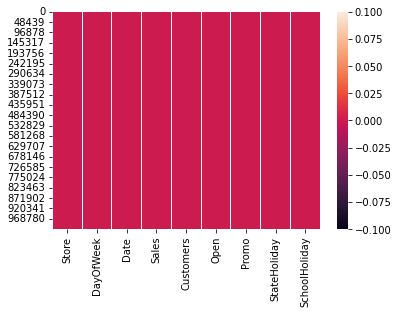

In [22]:
sns.heatmap(sales_train_df.isnull());

In [23]:
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

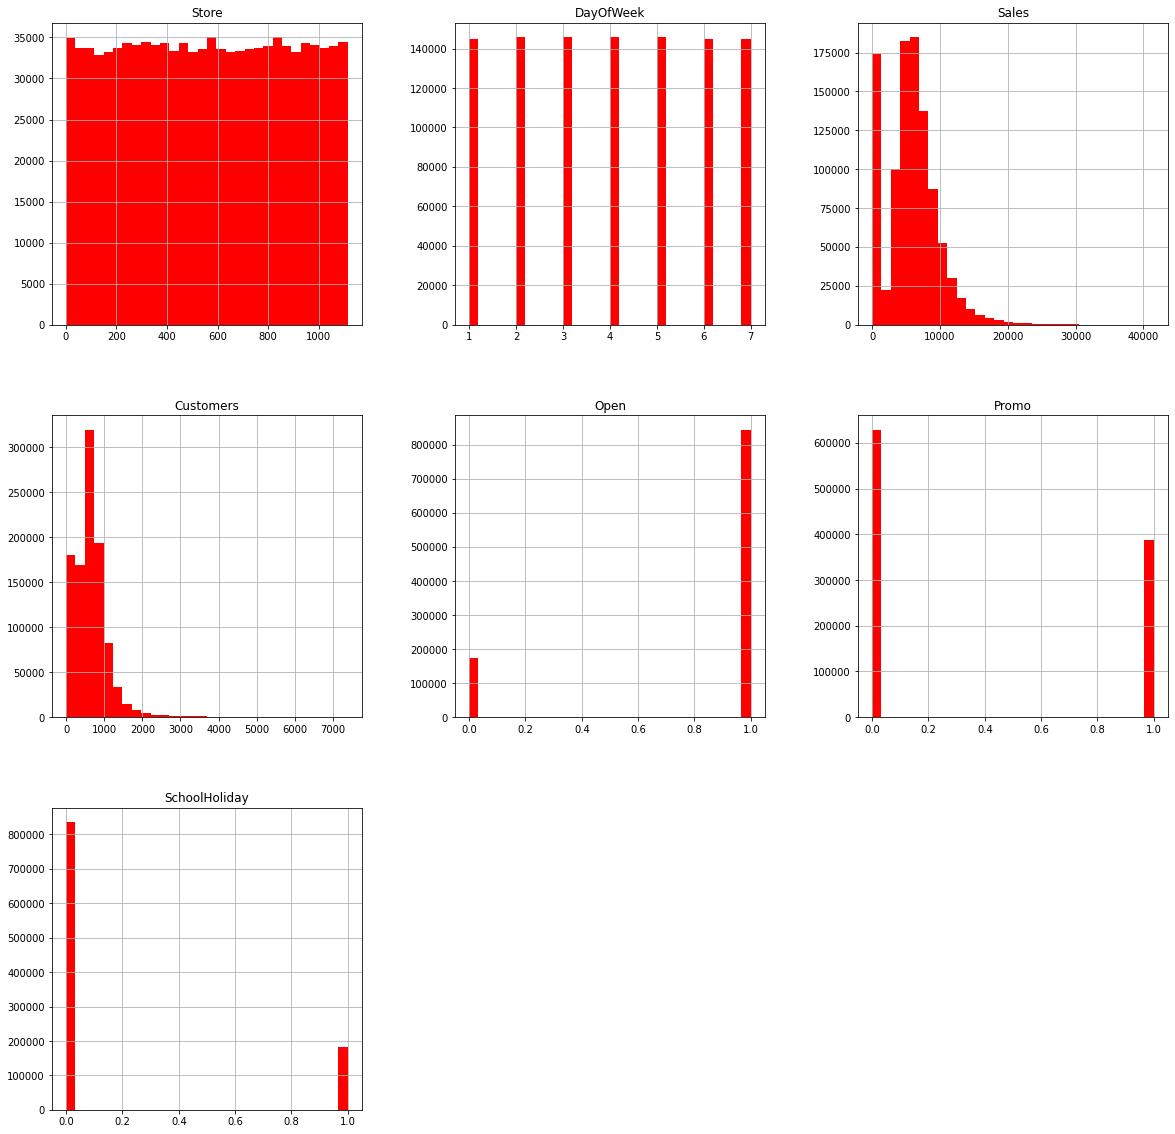

In [24]:
sales_train_df.hist(bins= 30, figsize=(20,20),color = 'r');

In [25]:
sales_train_df['Customers'].max()

7388

In [26]:
closed_train_df = sales_train_df[sales_train_df['Open']==0]

In [27]:
open_train_df = sales_train_df[sales_train_df['Open']==1]

In [28]:
print('Total = ',len(sales_train_df))
print('Número de lojas/dias fechado = ',len(closed_train_df))
print('Número de lojas/dias aberto = ',len(open_train_df))

Total =  1017209
Número de lojas/dias fechado =  172817
Número de lojas/dias aberto =  844392


In [29]:
172817/len(store_info_df) #diasfechado

154.99282511210762

In [30]:
844392/len(store_info_df) #dias aberto

757.3022421524664

In [31]:
sales_train_df = sales_train_df[sales_train_df['Open']==1]

In [32]:
sales_train_df.shape

(844392, 9)

In [33]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [34]:
sales_train_df.drop(['Open'],axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [36]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


**Dados das lojas**

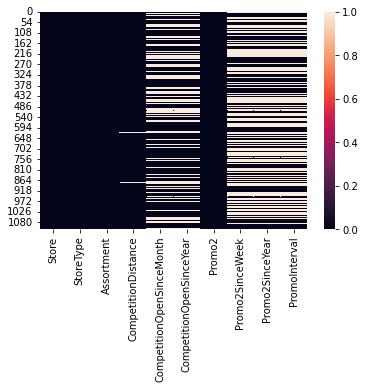

In [37]:
sns.heatmap(store_info_df.isnull());

In [38]:
store_info_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [39]:
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [40]:
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [41]:
store_info_df[store_info_df['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [42]:
store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [43]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_cols:
  store_info_df[str].fillna(0, inplace=True)

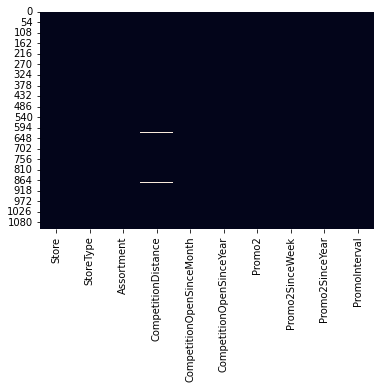

In [44]:
sns.heatmap(store_info_df.isnull(), cbar = False);

In [45]:
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)

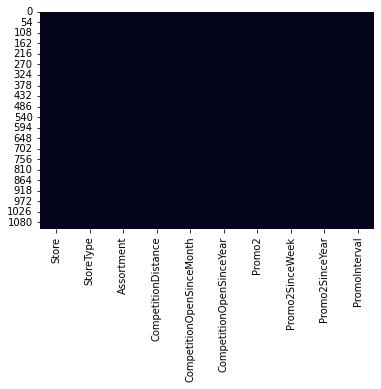

In [46]:
sns.heatmap(store_info_df.isnull(), cbar = False);

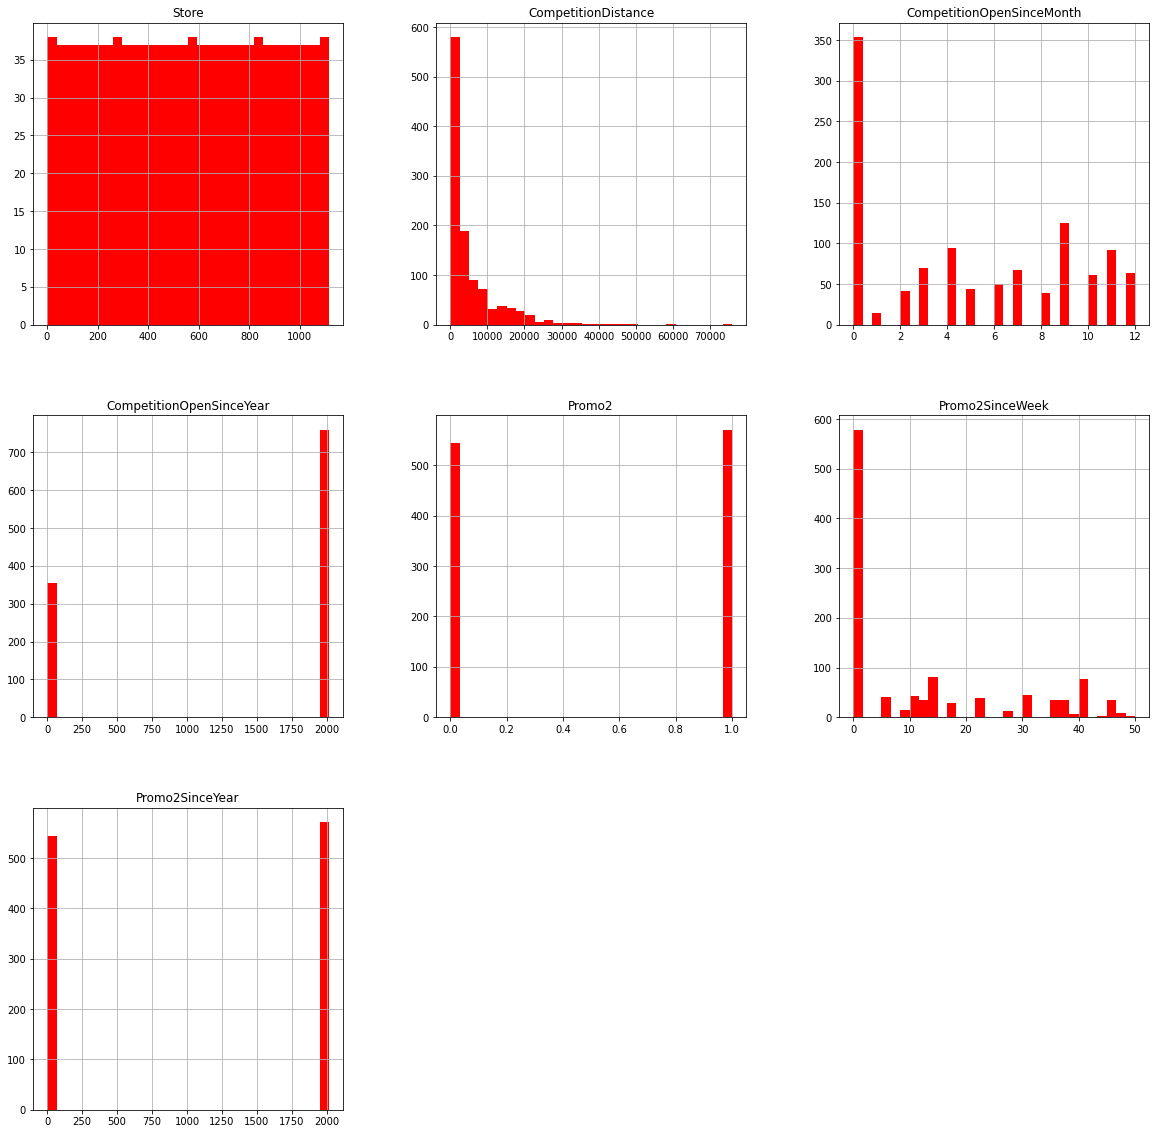

In [47]:
store_info_df.hist(bins = 30, figsize=(20,20), color = 'r');

**Vendas + lojas**

In [48]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [49]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [50]:
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how= 'inner',on= 'Store')

In [51]:
sales_train_all_df.shape

(844392, 17)

In [52]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [53]:
sales_train_all_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844391,292,3,2013-01-02,5076,672,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


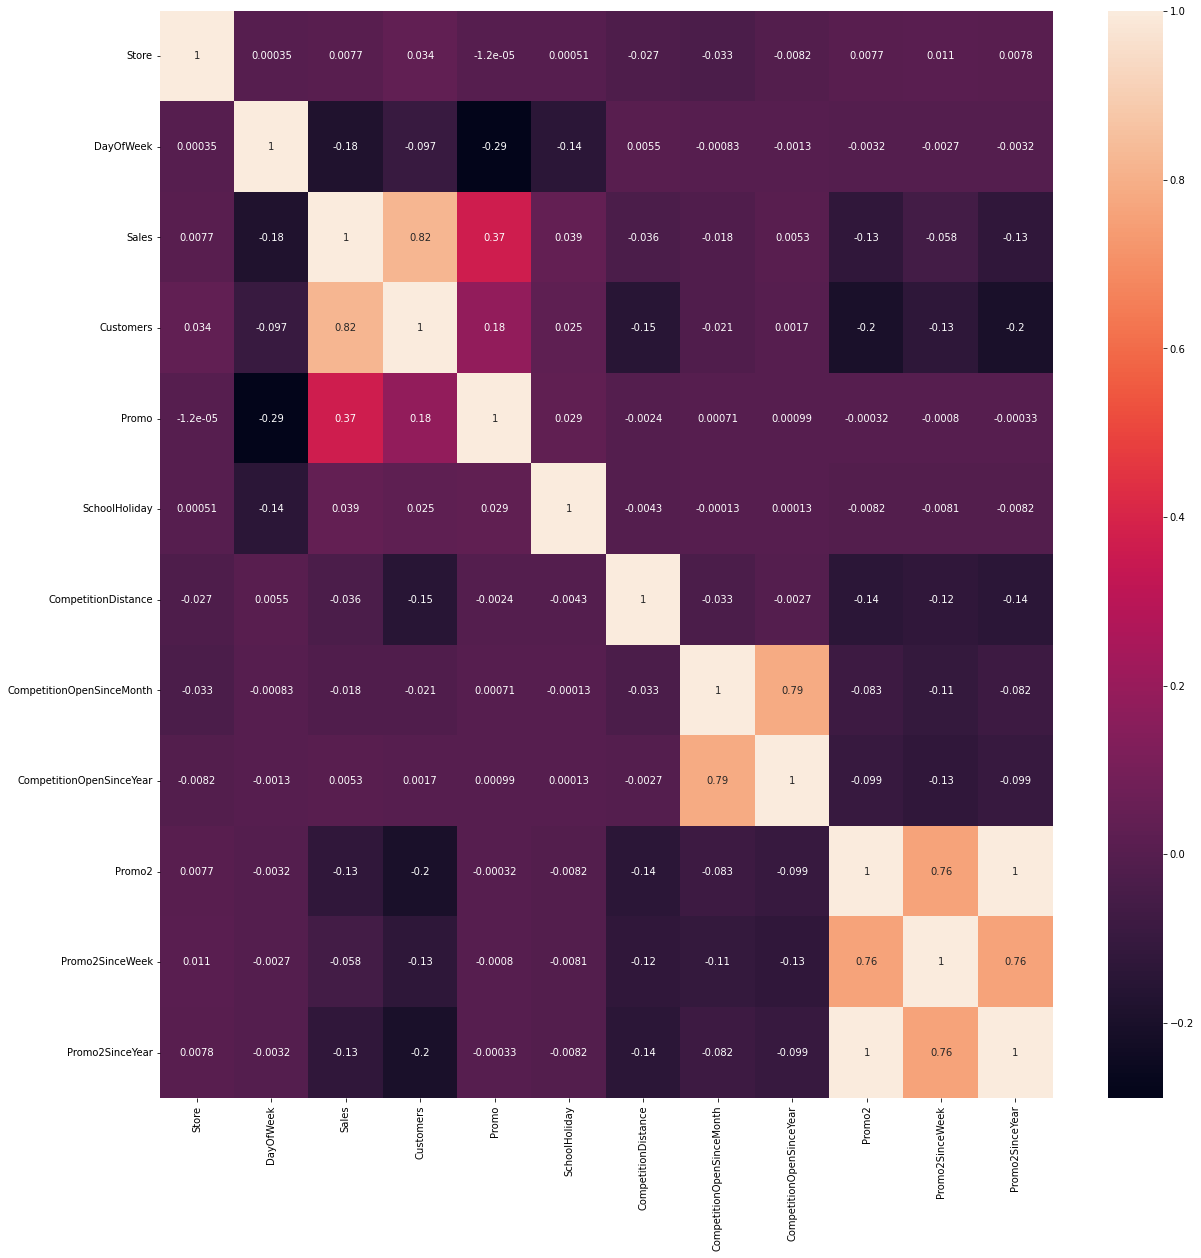

In [54]:
correlations = sales_train_all_df.corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations,annot=True);

In [55]:
correlations = sales_train_all_df.corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

In [56]:
sales_train_all_df['Year'] =pd.DatetimeIndex(sales_train_all_df['Date']).year

In [57]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015


In [58]:
sales_train_all_df['Month'] =pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] =pd.DatetimeIndex(sales_train_all_df['Date']).day

In [59]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


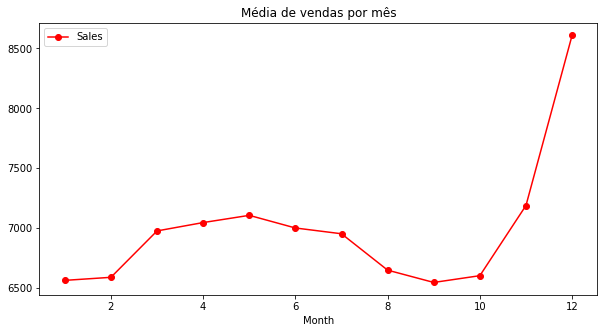

In [60]:
axis= sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize=(10,5),marker='o',color= 'r')
axis.set_title('Média de vendas por mês');

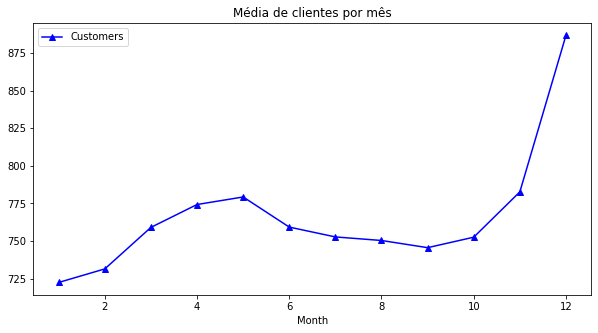

In [61]:
axis= sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize=(10,5),marker='^',color= 'b')
axis.set_title('Média de clientes por mês');

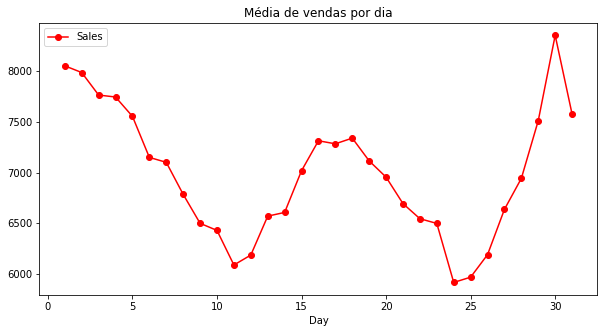

In [62]:
axis= sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize=(10,5),marker='o',color= 'r')
axis.set_title('Média de vendas por dia');

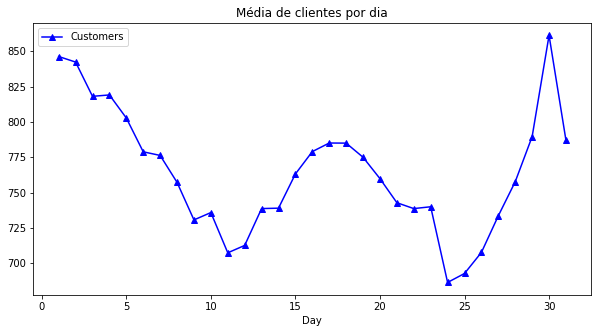

In [63]:
axis= sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize=(10,5),marker='^',color= 'b')
axis.set_title('Média de clientes por dia');

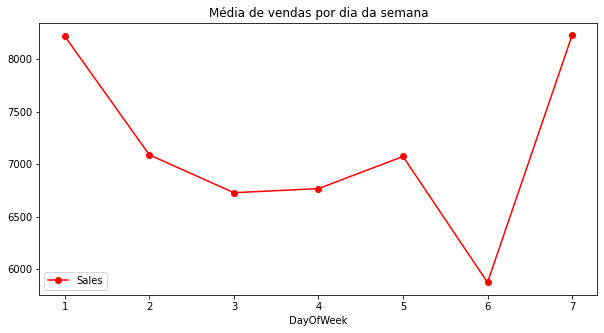

In [64]:
axis= sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(10,5),marker='o',color= 'r')
axis.set_title('Média de vendas por dia da semana');

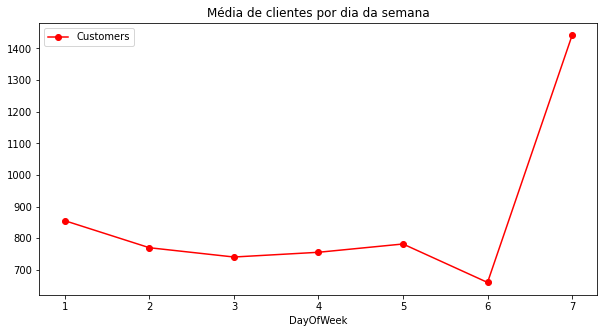

In [65]:
axis= sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize=(10,5),marker='o',color= 'r')
axis.set_title('Média de clientes por dia da semana');

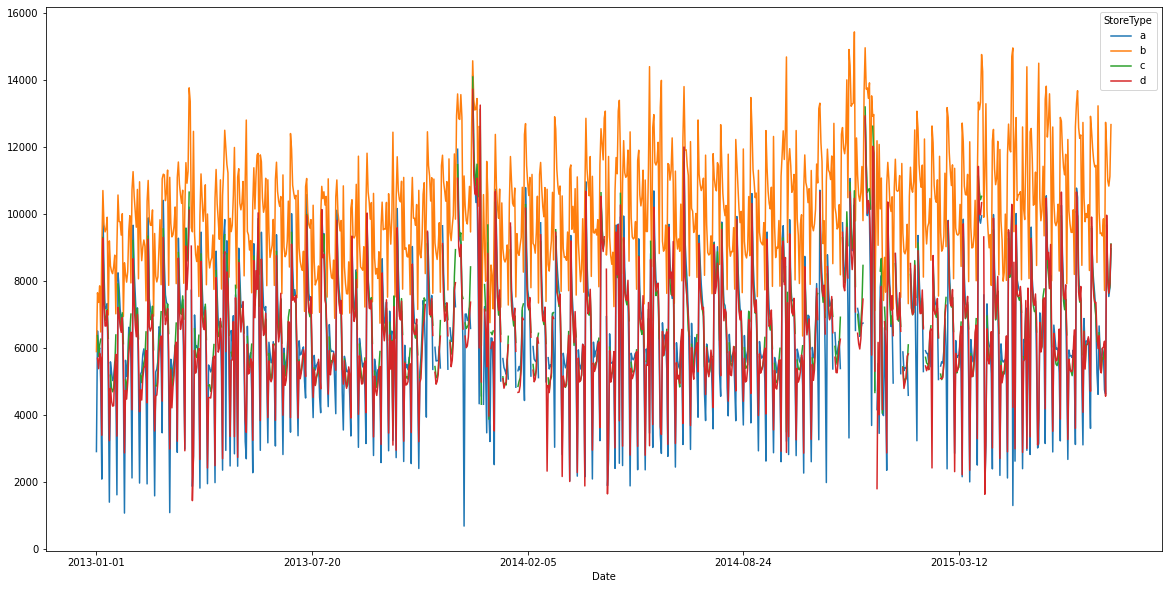

In [66]:
fig,ax= plt.subplots(figsize=(20,10))
sales_train_all_df.groupby(['Date','StoreType']).mean()['Sales'].unstack().plot(ax=ax)

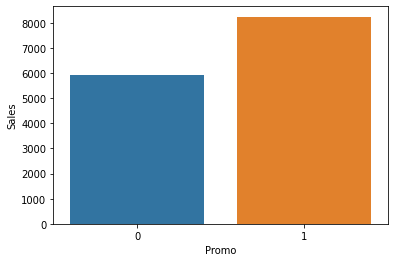

In [67]:
sns.barplot(x='Promo',y= 'Sales',data =sales_train_all_df)

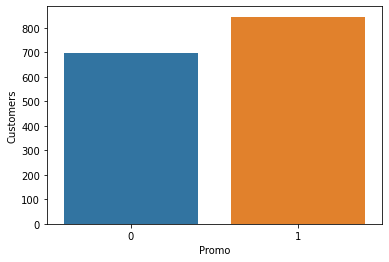

In [68]:
sns.barplot(x='Promo',y= 'Customers',data =sales_train_all_df)

**Treinamento do modelo**

In [69]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
from fbprophet import Prophet

In [78]:
def sales_prediction(store_id, sales_df, periods):
  sales_df= sales_df[sales_df['Store']==store_id]
  sales_df = sales_df[['Date','Sales']].rename(columns= {'Date':'ds','Sales':'y'})
  sales_df= sales_df.sort_values(by= 'ds')

  model= Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods=periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast,xlabel='Data', ylabel='Vendas')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

In [76]:
#df = sales_prediction(10,sales_train_all_df,60 )
#df

,ds,y
7819,2013-01-02,4812
7818,2013-01-03,4675
7817,2013-01-04,5114
7816,2013-01-05,4256
7815,2013-01-07,7804
...,...,...
7040,2015-07-27,7212
7039,2015-07-28,6140
7038,2015-07-29,5524
7037,2015-07-30,6186


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


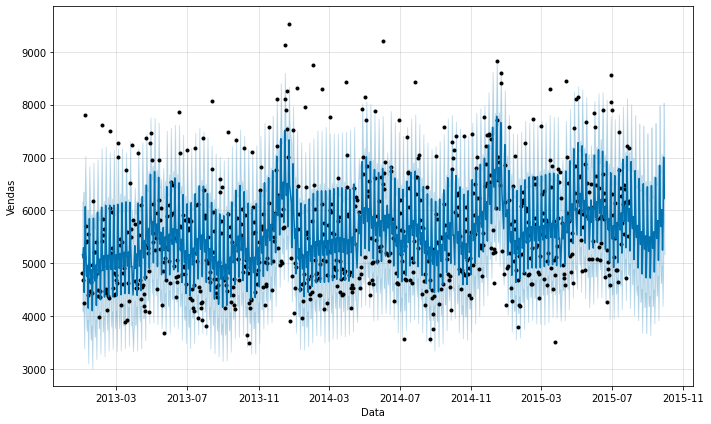

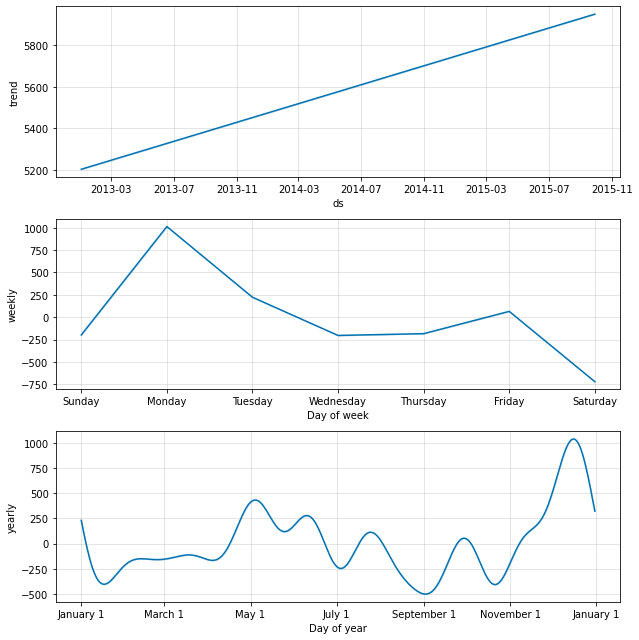

In [87]:
df_origin, df_prediction = sales_prediction(10,sales_train_all_df,60);

In [81]:
df_origin.shape, df_prediction.shape

((784, 2), (794, 19))

In [88]:
df_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5204.484727,4089.046187,6166.240705,5204.484727,5204.484727,-44.077962,-44.077962,-44.077962,-203.046067,-203.046067,-203.046067,158.968105,158.968105,158.968105,0.0,0.0,0.0,5160.406765
1,2013-01-03,5205.228405,4084.447736,6132.479652,5205.228405,5205.228405,-93.232653,-93.232653,-93.232653,-183.012971,-183.012971,-183.012971,89.780317,89.780317,89.780317,0.0,0.0,0.0,5111.995752
2,2013-01-04,5205.972083,4248.625044,6352.368902,5205.972083,5205.972083,89.471792,89.471792,89.471792,65.942825,65.942825,65.942825,23.528967,23.528967,23.528967,0.0,0.0,0.0,5295.443875
3,2013-01-05,5206.715761,3388.470083,5544.734795,5206.715761,5206.715761,-758.331393,-758.331393,-758.331393,-719.174286,-719.174286,-719.174286,-39.157107,-39.157107,-39.157107,0.0,0.0,0.0,4448.384368
4,2013-01-07,5208.203117,4994.420838,7028.463000,5208.203117,5208.203117,861.318599,861.318599,861.318599,1013.040634,1013.040634,1013.040634,-151.722034,-151.722034,-151.722034,0.0,0.0,0.0,6069.521716


In [90]:
df_prediction.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
784,2015-08-01,5904.754320,4156.090787,6289.120192,5904.754320,5904.754320,-673.734983,-673.734983,-673.734983,-719.174286,-719.174286,-719.174286,45.439303,45.439303,45.439303,0.0,0.0,0.0,5231.019337
785,2015-08-02,5905.498641,4650.279642,6800.412390,5905.498641,5905.498641,-172.385687,-172.385687,-172.385687,-197.423916,-197.423916,-197.423916,25.038229,25.038229,25.038229,0.0,0.0,0.0,5733.112954
786,2015-08-03,5906.242962,6000.578628,8002.552362,5906.242962,5906.242962,1015.917486,1015.917486,1015.917486,1013.040634,1013.040634,1013.040634,2.876853,2.876853,2.876853,0.0,0.0,0.0,6922.160448
787,2015-08-04,5906.987283,5091.463890,7198.040448,5906.987283,5906.987283,202.989916,202.989916,202.989916,223.673781,223.673781,223.673781,-20.683865,-20.683865,-20.683865,0.0,0.0,0.0,6109.977199
788,2015-08-05,5907.731604,4596.199883,6757.669392,5907.731604,5907.731604,-248.332224,-248.332224,-248.332224,-203.046067,-203.046067,-203.046067,-45.286157,-45.286157,-45.286157,0.0,0.0,0.0,5659.399381
789,2015-08-06,5908.475925,4666.583900,6748.520735,5908.475925,5908.475925,-253.597221,-253.597221,-253.597221,-183.012971,-183.012971,-183.012971,-70.584250,-70.584250,-70.584250,0.0,0.0,0.0,5654.878705
790,2015-08-07,5909.220246,4888.828835,6992.462040,5909.220246,5909.220246,-30.309420,-30.309420,-30.309420,65.942825,65.942825,65.942825,-96.252245,-96.252245,-96.252245,0.0,0.0,0.0,5878.910826
791,2015-08-08,5909.964567,4014.138109,6123.805001,5909.964567,5909.964567,-841.165148,-841.165148,-841.165148,-719.174286,-719.174286,-719.174286,-121.990862,-121.990862,-121.990862,0.0,0.0,0.0,5068.799419
792,2015-08-09,5910.708888,4492.812958,6590.279398,5910.708887,5910.708889,-344.956807,-344.956807,-344.956807,-197.423916,-197.423916,-197.423916,-147.532891,-147.532891,-147.532891,0.0,0.0,0.0,5565.752082
793,2015-08-10,5911.453209,5743.864514,7799.587582,5911.453201,5911.453216,840.393413,840.393413,840.393413,1013.040634,1013.040634,1013.040634,-172.647221,-172.647221,-172.647221,0.0,0.0,0.0,6751.846622


In [91]:
df_prediction.tail(60).to_csv('previsoes_vendas.csv')

In [92]:
def sales_prediction(store_id, sales_df, holidays, periods):
  sales_df= sales_df[sales_df['Store']==store_id]
  sales_df = sales_df[['Date','Sales']].rename(columns= {'Date':'ds','Sales':'y'})
  sales_df= sales_df.sort_values(by= 'ds')

  model= Prophet(holidays=holidays)
  model.fit(sales_df)
  future = model.make_future_dataframe(periods=periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast,xlabel='Data', ylabel='Vendas')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

In [95]:
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday']==1].loc[:,'Date'].values
school_holidays.shape

(163457,)

In [96]:
school_holidays

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [97]:
len(np.unique(school_holidays))

477

In [99]:
state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday']=='a') |
                                    (sales_train_all_df['StateHoliday']=='b') |
                                    (sales_train_all_df['StateHoliday']=='c')].loc[:,'Date'].values

In [100]:
state_holidays.shape

(910,)

In [101]:
len(np.unique(state_holidays))

35

In [102]:
state_holidays= pd.DataFrame({'ds':pd.to_datetime(state_holidays),
                              'holiday': 'stateholiday'})
state_holidays

,ds,holiday
0,2014-10-03,stateholiday
1,2013-10-03,stateholiday
2,2015-06-04,stateholiday
3,2014-06-19,stateholiday
4,2013-05-30,stateholiday
...,...,...
905,2013-04-01,stateholiday
906,2013-08-15,stateholiday
907,2015-06-04,stateholiday
908,2014-06-19,stateholiday


In [105]:
school_holidays= pd.DataFrame({'ds':pd.to_datetime(school_holidays),
                              'holiday': 'school_holiday'})
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


In [106]:
school_state_holidays= pd.concat((state_holidays, school_holidays))
school_state_holidays

,ds,holiday
0,2014-10-03,stateholiday
1,2013-10-03,stateholiday
2,2015-06-04,stateholiday
3,2014-06-19,stateholiday
4,2013-05-30,stateholiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


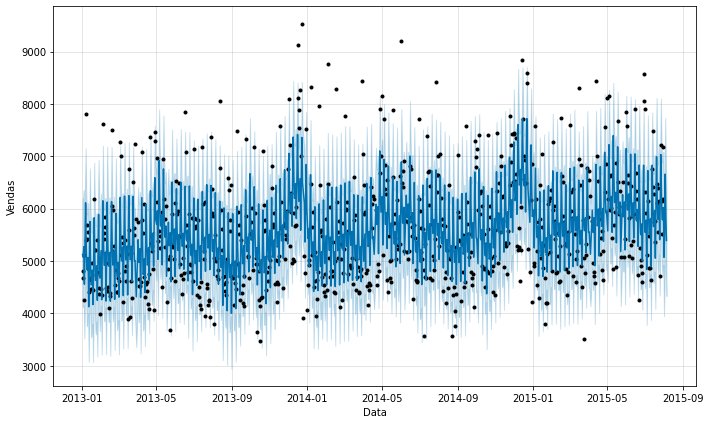

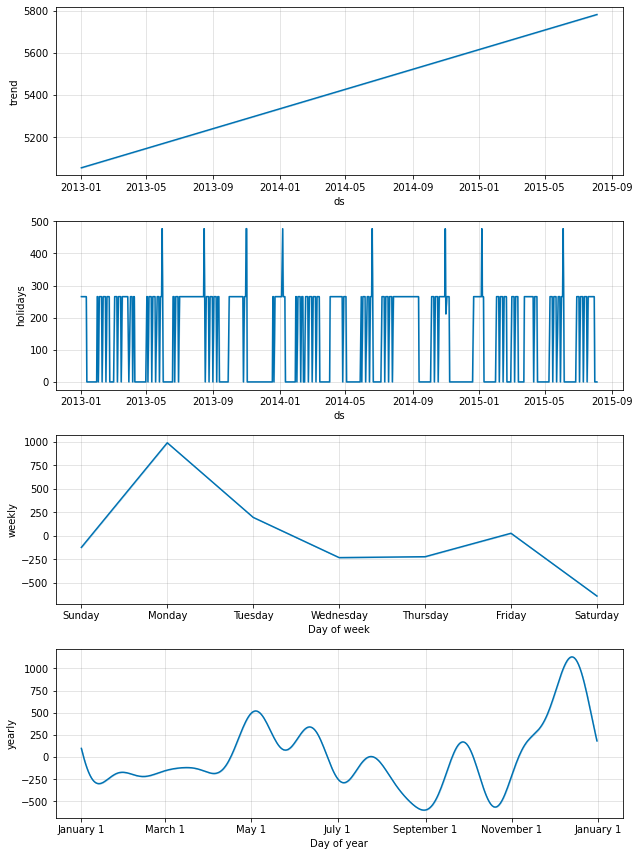

In [107]:
df_original, df_prediction= sales_prediction(10,sales_train_all_df,school_state_holidays,5)

In [109]:
df_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5054.623831,4147.233441,6188.075132,5054.623831,5054.623831,68.739935,68.739935,68.739935,265.50214,...,-231.157861,-231.157861,-231.157861,34.395656,34.395656,34.395656,0.0,0.0,0.0,5123.363767
1,2013-01-03,5055.395044,4121.600688,6192.914329,5055.395044,5055.395044,19.621422,19.621422,19.621422,265.50214,...,-221.725581,-221.725581,-221.725581,-24.155137,-24.155137,-24.155137,0.0,0.0,0.0,5075.016466
2,2013-01-04,5056.166258,4146.247440,6354.215006,5056.166258,5056.166258,215.912637,215.912637,215.912637,265.50214,...,27.862288,27.862288,27.862288,-77.451792,-77.451792,-77.451792,0.0,0.0,0.0,5272.078895
3,2013-01-05,5056.937471,3521.044538,5659.162415,5056.937471,5056.937471,-499.467146,-499.467146,-499.467146,265.50214,...,-639.832929,-639.832929,-639.832929,-125.136358,-125.136358,-125.136358,0.0,0.0,0.0,4557.470324
4,2013-01-07,5058.479897,5107.849650,7155.669004,5058.479897,5058.479897,1053.239106,1053.239106,1053.239106,265.50214,...,990.574123,990.574123,990.574123,-202.837157,-202.837157,-202.837157,0.0,0.0,0.0,6111.719002
